## Project: Exploring Inequities: An Analysis of the Calgary Equity Index- 2024


### Individual Milestone
**Data 604: Winter 2025**<br><br>
**Team member**: Deepika Gollamandala<br>
**Date**: 18th March, 2025 <br>



### Overall Objective (for this team member):

From the data in domains of **Human and Social Well being/ Climate and Environment** : 

We seek to identify which communities in Calgary are performing well and which are lagging in terms of human and social well-being indicators. We aim to uncover common features among communities that are struggling in these areas. 

Additionally, we will analyze the average climate and environment domain score for Calgary, 
and identify communities at highest risk of flooding and those experiencing the most noise pollution.

### For this individual milestone of the project:
We explore the variables in the Climate and Environment Domain. 

The variables in Climate and Environment Domain are:

* Flood Susceptibility Score
* Land Surface Temperature
* Noise Pollution Score
* Share of Park Area
* Tree Canopy
* Tree Density
______________________________________

**Notes from meta data of CEI** 

**Note 1**:
The total equity score is a weighted combination of all 61 indicators, where the weights are based on each indicator's relationship with and impact on the total equity score. Higher total equity scores reflect areas of greater inequities and more overlapping barriers or needs. Lower total equity scores reflect areas with fewer inequities and fewer overlapping concerns. 

**Note 2**:
Climate and Environment Domain Score	The Climate and Environment domain score is an equally weighted combination of indicators that reflect climate risks and environmental conditions in Calgary. A high domain score reflects areas with greater inequities and more climate and environmental needs (such as areas with fewer trees, hotter temperatures, high flood risks, and more noise pollution). A low domain score reflects areas with fewer inequities and fewer climate and environmental needs (such as areas with greater tree density, lower flood risk, and more green spaces). 	All climate and environment indicators

In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
import sqlalchemy
print(sqlalchemy.__version__)

2.0.39


In [3]:
import pandas
print(pandas.__version__)

2.0.3


In [4]:
# Load the CSV into a DataFrame
df = pd.read_csv("2024_CEI_Data.csv") 

# Create an in-memory SQLite database using SQLAlchemy
engine = create_engine('sqlite:///:memory:')

# Write the DataFrame to the SQLite database
df.to_sql('CEI_table', engine, index=False, if_exists='replace')  

# Run SQL queries 
query = "SELECT * FROM CEI_table"  
result = pd.read_sql_query(query, engine)

# Display the results
print(result)

          CTUID                      Communities Quadrant  \
0    8250001.01                   CANYON MEADOWS       SW   
1    8250001.02                   LAKE BONAVISTA       SE   
2    8250001.03  BONAVISTA DOWNS, LAKE BONAVISTA       SE   
3    8250001.04                       QUEENSLAND       SE   
4    8250001.05                   LAKE BONAVISTA       SE   
..          ...                              ...      ...   
283  8250077.38                        SAGE HILL       NW   
284  8250077.39                KINCORA, SHERWOOD       NW   
285  8250077.40                         HAWKWOOD       NW   
286  8250077.41                       RANCHLANDS       NW   
287  8250202.01                              03W       NW   

     total_weighted_CEI_Score  economic_opportunity_domain_score  \
0                       39.53                              28.29   
1                       27.77                              20.83   
2                       32.75                              17.6

In [5]:
# Query the database for column information
query = "PRAGMA table_info(CEI_table);"
result = pd.read_sql_query(query, engine)

# Display the column names
column_names = result['name'].tolist()
print("Column names:", column_names)

Column names: ['CTUID', 'Communities', 'Quadrant', 'total_weighted_CEI_Score', 'economic_opportunity_domain_score', 'accessibility_and_amenities_domain_score', 'population_health_domain_score', 'community_belonging_and_safety_domain_score', 'human_and_social_wellbeing_domain_score', 'climate_and_environment_domain_score', 'activity_limitation_relative_severity_perc', 'adult_litp', 'average_commute_time', 'average_transitscore', 'average_walkscore', 'children_perc', 'commute_transit_perc', 'commute_vehicle_perc', 'copd_agestd_perc', 'core_housing_owner_perc', 'core_housing_renter_perc', 'diabetes_agestd_perc', 'educ_no_cert_perc', 'first_generation_perc', 'flood_susceptibility', 'gender_income_ratio', 'income_inequality_ratio', 'indigenous_perc', 'land_surface_temp', 'lim_at_perc', 'mental_illness_agestd_perc', 'movers_1_year_ago', 'no_official_languages_perc', 'noise_pollution_score', 'park_area_perc', 'part_time_employment_perc', 'perceived_health_vg_excellent_perc', 'perceived_mental

In [7]:
# creating a new dataframe (table) with the variables belonging to the domain "Climate and Environment"


selected_env_and_climate = ['CTUID', 'Communities', 'Quadrant', 
    'total_weighted_CEI_Score', 
    'human_and_social_wellbeing_domain_score', 
    'climate_and_environment_domain_score',
    'flood_susceptibility', 
    'land_surface_temp', 
    'noise_pollution_score', 
    'park_area_perc', 
    'tree_canopy', 
    'tree_density']

env_climate_df = df[selected_env_and_climate]

In [8]:
env_climate_df.to_sql('ClimateEnvironment', engine, index = False, if_exists = 'replace')

# selecting all the rows and columns from the new data table named ClimateEnvironment
query= "SELECT * from ClimateEnvironment"
result = pd.read_sql_query(query, engine)

print(result)

          CTUID                      Communities Quadrant  \
0    8250001.01                   CANYON MEADOWS       SW   
1    8250001.02                   LAKE BONAVISTA       SE   
2    8250001.03  BONAVISTA DOWNS, LAKE BONAVISTA       SE   
3    8250001.04                       QUEENSLAND       SE   
4    8250001.05                   LAKE BONAVISTA       SE   
..          ...                              ...      ...   
283  8250077.38                        SAGE HILL       NW   
284  8250077.39                KINCORA, SHERWOOD       NW   
285  8250077.40                         HAWKWOOD       NW   
286  8250077.41                       RANCHLANDS       NW   
287  8250202.01                              03W       NW   

     total_weighted_CEI_Score  human_and_social_wellbeing_domain_score  \
0                       39.53                                    24.09   
1                       27.77                                    19.51   
2                       32.75                

In [71]:
query = """
SELECT total_weighted_CEI_Score, climate_and_environment_domain_score, Quadrant, economic_opportunity_domain_score,
accessibility_and_amenities_domain_score, population_health_domain_score, community_belonging_and_safety_domain_score,
human_and_social_wellbeing_domain_score
FROM CEI_table

ORDER BY total_weighted_CEI_Score;
"""
result = pd.read_sql_query(query, engine)

print(result)
result.columns

     total_weighted_CEI_Score  climate_and_environment_domain_score Quadrant  \
0                       16.84                                 32.08       SW   
1                       17.86                                 41.60       SW   
2                       21.29                                 37.67       SW   
3                       22.86                                 48.44       NW   
4                       23.07                                 53.61       SW   
..                        ...                                   ...      ...   
283                     67.40                                 57.92       SE   
284                     67.75                                 66.67       SE   
285                     69.59                                 63.61       SE   
286                     69.87                                 56.63       SE   
287                     78.14                                 54.50       SE   

     economic_opportunity_domain_score 

Index(['total_weighted_CEI_Score', 'climate_and_environment_domain_score',
       'Quadrant', 'economic_opportunity_domain_score',
       'accessibility_and_amenities_domain_score',
       'population_health_domain_score',
       'community_belonging_and_safety_domain_score',
       'human_and_social_wellbeing_domain_score'],
      dtype='object')

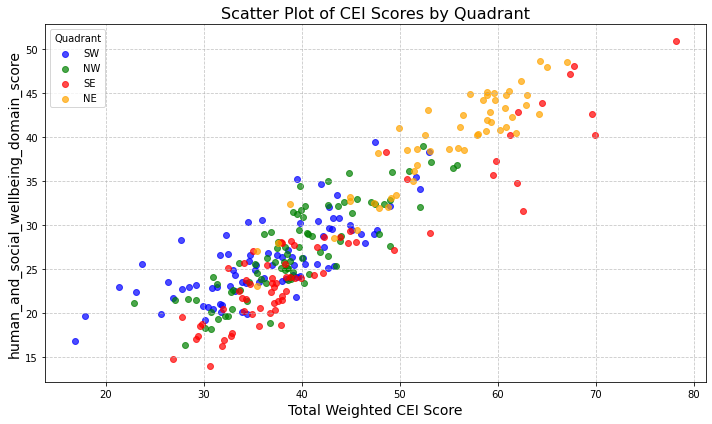

In [72]:
quadrant_colors = {'SW': 'blue', 'NW': 'green', 'SE': 'red', 'NE': 'orange'}
result['Color'] = result['Quadrant'].map(quadrant_colors)

# Scatter plot
plt.figure(figsize=(10, 6))
for quadrant in result['Quadrant'].unique():
    quadrant_data = result[result['Quadrant'] == quadrant]
    plt.scatter(
        quadrant_data['total_weighted_CEI_Score'], 
        quadrant_data['human_and_social_wellbeing_domain_score'], 
        color=quadrant_colors[quadrant], 
        label=quadrant, 
        alpha=0.7
    )

# Add labels, title, and legend
plt.title('Scatter Plot of CEI Scores by Quadrant', fontsize=16)
plt.xlabel('Total Weighted CEI Score', fontsize=14)
plt.ylabel('human_and_social_wellbeing_domain_score', fontsize=14)
plt.legend(title='Quadrant')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

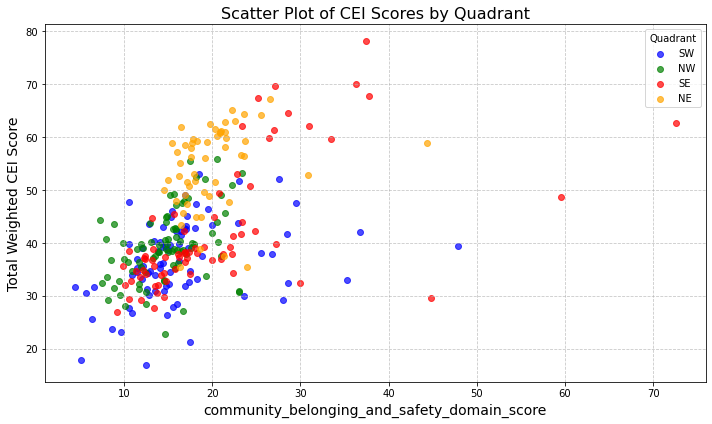

In [73]:
quadrant_colors = {'SW': 'blue', 'NW': 'green', 'SE': 'red', 'NE': 'orange'}
result['Color'] = result['Quadrant'].map(quadrant_colors)

# Scatter plot
plt.figure(figsize=(10, 6))
for quadrant in result['Quadrant'].unique():
    quadrant_data = result[result['Quadrant'] == quadrant]
    plt.scatter(
        quadrant_data['community_belonging_and_safety_domain_score'],
        quadrant_data['total_weighted_CEI_Score'], 
        
        color=quadrant_colors[quadrant], 
        label=quadrant, 
        alpha=0.7
    )

# Add labels, title, and legend
plt.title('Scatter Plot of CEI Scores by Quadrant', fontsize=16)
plt.ylabel('Total Weighted CEI Score', fontsize=14)
plt.xlabel('community_belonging_and_safety_domain_score', fontsize=14)
plt.legend(title='Quadrant')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

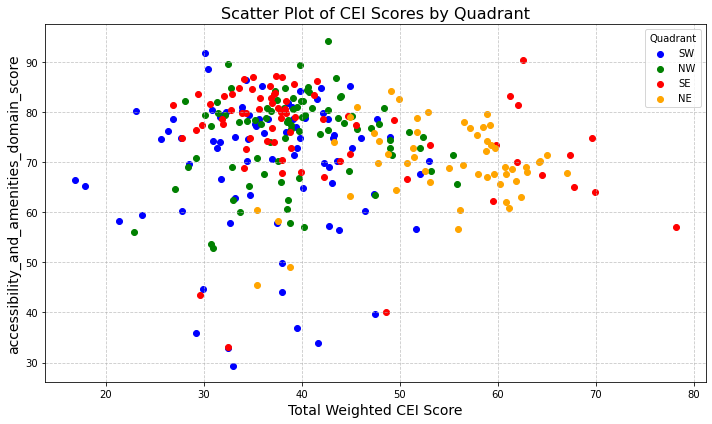

In [74]:
quadrant_colors = {'SW': 'blue', 'NW': 'green', 'SE': 'red', 'NE': 'orange'}
result['Color'] = result['Quadrant'].map(quadrant_colors)

# Scatter plot
plt.figure(figsize=(10, 6))
for quadrant in result['Quadrant'].unique():
    quadrant_data = result[result['Quadrant'] == quadrant]
    plt.scatter(
        quadrant_data['total_weighted_CEI_Score'], 
        quadrant_data['accessibility_and_amenities_domain_score'], 
        color=quadrant_colors[quadrant], 
        label=quadrant, 
        alpha= 1.0
    )

# Add labels, title, and legend
plt.title('Scatter Plot of CEI Scores by Quadrant', fontsize=16)
plt.xlabel('Total Weighted CEI Score', fontsize=14)
plt.ylabel('accessibility_and_amenities_domain_score', fontsize=14)
plt.legend(title='Quadrant')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

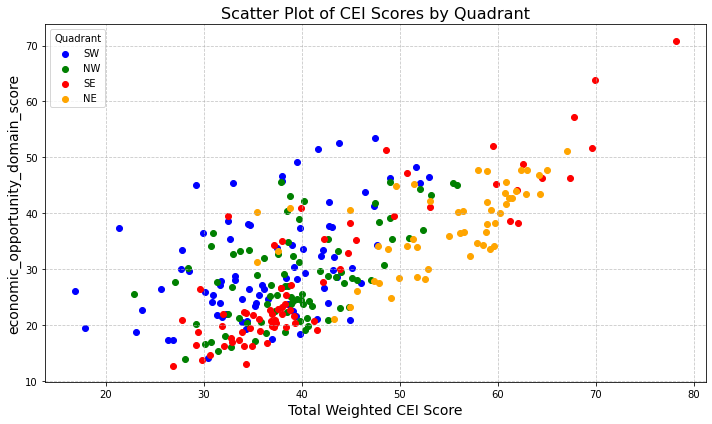

In [75]:
quadrant_colors = {'SW': 'blue', 'NW': 'green', 'SE': 'red', 'NE': 'orange'}
result['Color'] = result['Quadrant'].map(quadrant_colors)

# Scatter plot
plt.figure(figsize=(10, 6))
for quadrant in result['Quadrant'].unique():
    quadrant_data = result[result['Quadrant'] == quadrant]
    plt.scatter(
        quadrant_data['total_weighted_CEI_Score'], 
        quadrant_data['economic_opportunity_domain_score'], 
        color=quadrant_colors[quadrant], 
        label=quadrant, 
        alpha= 1.0
    )

# Add labels, title, and legend
plt.title('Scatter Plot of CEI Scores by Quadrant', fontsize=16)
plt.xlabel('Total Weighted CEI Score', fontsize=14)
plt.ylabel('economic_opportunity_domain_score', fontsize=14)
plt.legend(title='Quadrant')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

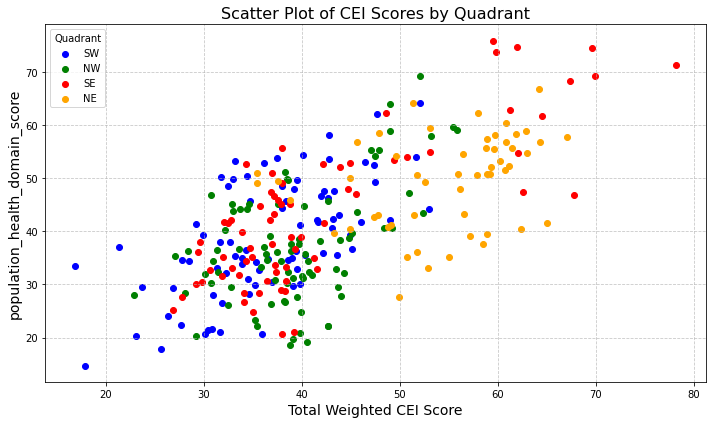

In [76]:
quadrant_colors = {'SW': 'blue', 'NW': 'green', 'SE': 'red', 'NE': 'orange'}
result['Color'] = result['Quadrant'].map(quadrant_colors)

# Scatter plot
plt.figure(figsize=(10, 6))
for quadrant in result['Quadrant'].unique():
    quadrant_data = result[result['Quadrant'] == quadrant]
    plt.scatter(
        quadrant_data['total_weighted_CEI_Score'], 
        quadrant_data['population_health_domain_score'], 
        color=quadrant_colors[quadrant], 
        label=quadrant, 
        alpha= 1.0
    )

# Add labels, title, and legend
plt.title('Scatter Plot of CEI Scores by Quadrant', fontsize=16)
plt.xlabel('Total Weighted CEI Score', fontsize=14)
plt.ylabel('population_health_domain_score', fontsize=14)
plt.legend(title='Quadrant')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

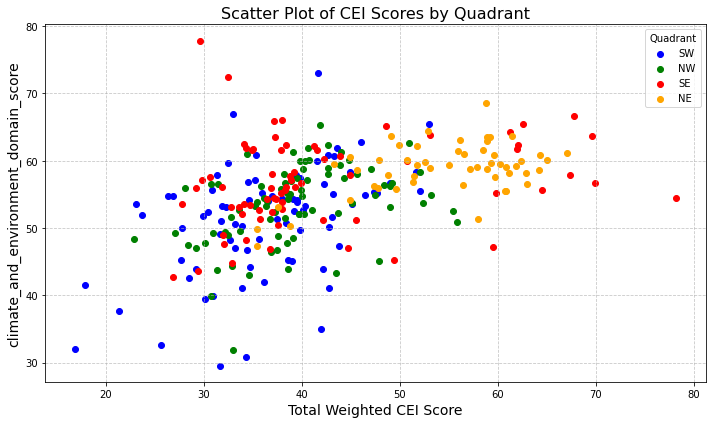

In [77]:
# len(result['climate_and_environment_domain_score'])
# result['climate_and_environment_domain_score'].isnull().sum()
#result['total_weighted_CEI_Score'].isnull().sum()

quadrant_colors = {'SW': 'blue', 'NW': 'green', 'SE': 'red', 'NE': 'orange'}
result['Color'] = result['Quadrant'].map(quadrant_colors)

# Scatter plot
plt.figure(figsize=(10, 6))
for quadrant in result['Quadrant'].unique():
    quadrant_data = result[result['Quadrant'] == quadrant]
    plt.scatter(
        quadrant_data['total_weighted_CEI_Score'], 
        quadrant_data['climate_and_environment_domain_score'], 
        color=quadrant_colors[quadrant], 
        label=quadrant, 
        alpha= 1.0
    )

# Add labels, title, and legend
plt.title('Scatter Plot of CEI Scores by Quadrant', fontsize=16)
plt.xlabel('Total Weighted CEI Score', fontsize=14)
plt.ylabel('climate_and_environment_domain_score', fontsize=14)
plt.legend(title='Quadrant')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [78]:
results.describe

<bound method NDFrame.describe of      total_weighted_CEI_Score  climate_and_environment_domain_score Quadrant  \
0                       16.84                                 32.08       SW   
1                       17.86                                 41.60       SW   
2                       21.29                                 37.67       SW   
3                       22.86                                 48.44       NW   
4                       23.07                                 53.61       SW   
..                        ...                                   ...      ...   
283                     67.40                                 57.92       SE   
284                     67.75                                 66.67       SE   
285                     69.59                                 63.61       SE   
286                     69.87                                 56.63       SE   
287                     78.14                                 54.50       SE   

     

### (1) What is the average CEI score for 2024 and average climate and environment domain score for each quadrant of Calgary?

In [9]:
query = """
SELECT AVG(total_weighted_CEI_Score) AS Avg_CEI_score, AVG(climate_and_environment_domain_score) as Avg_ClimateEnvironment_score, Quadrant
FROM CEI_table
GROUP BY Quadrant
ORDER BY Avg_CEI_score ASC;
"""
result = pd.read_sql_query(query, engine)
#result = pd.DataFrame(result)

print(result)

   Avg_CEI_score  Avg_ClimateEnvironment_score Quadrant
0      36.597654                     51.343210       SW
1      39.346951                     53.501098       NW
2      41.975211                     56.716056       SE
3      54.482778                     58.864630       NE


 ### (2) Community Most Susceptible to Floods:
 
 The community which is most susceptible to floods is GLENMORE PARK

In [8]:
query= """
SELECT CTUID, Communities, flood_susceptibility 
FROM ClimateEnvironment 
ORDER BY flood_susceptibility DESC 
LIMIT 3
"""
result = pd.read_sql_query(query, engine)

print(result)

        CTUID    Communities  flood_susceptibility
0  8250007.05  GLENMORE PARK                 59.77
1  8250031.01       BELTLINE                 22.62
2  8250002.29    COPPERFIELD                 20.78


In [9]:
import folium
import geopandas as gpd

# Load the GeoJSON or shapefile data for Calgary flood zones
# Replace 'flood_data.geojson' with the path to your flood data file
flood_data = gpd.read_file('flood_data.geojson')

# Filter the data for high flood susceptibility areas
# Replace 'flood_susceptibility' and 'High' with the appropriate column and value in your dataset
high_flood_areas = flood_data[flood_data['flood_susceptibility'] == 'High']

# Create a map centered on Calgary
calgary_map = folium.Map(location=[51.0447, -114.0719], zoom_start=12)

# Add the high flood susceptibility areas to the map
for _, row in high_flood_areas.iterrows():
    folium.GeoJson(row['geometry'], 
                   style_function=lambda x: {'fillColor': 'red', 'color': 'red', 'weight': 1, 'fillOpacity': 0.5}
                  ).add_to(calgary_map)

# Save the map to an HTML file or display it
calgary_map.save('calgary_flood_map.html')
calgary_map

ModuleNotFoundError: No module named 'folium'

In [11]:
pip install folium

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

branca 0.8.1 requires jinja2>=3, but you'll have jinja2 2.11.2 which is incompatible.


In [15]:
import folium

# Create a base map centered on Calgary
calgary_map = folium.Map(location=[51.0447, -114.0719], zoom_start=12)

# Add markers for the top communities
communities = [
    {'name': 'GLENMORE PARK', 'location': [51.0155, -114.1020], 'susceptibility': 59.77},
    {'name': 'BELTLINE', 'location': [51.0424, -114.0628], 'susceptibility': 22.62},
    {'name': 'COPPERFIELD', 'location': [50.9215, -113.9366], 'susceptibility': 20.78},
]

for community in communities:
    folium.Marker(
        location=community['location'],
        popup=f"{community['name']}<br>Flood Susceptibility: {community['susceptibility']}",
        icon=folium.Icon(color='red' if community['susceptibility'] > 50 else 'orange')
    ).add_to(calgary_map)

# Save or display the map
calgary_map.save('calgary_flood_susceptibility.html')
calgary_map

### (3) The  3 communities that are most susceptible to floods:

In [10]:
query = """
SELECT CTUID, Communities, flood_susceptibility, quadrant, total_weighted_CEI_Score, climate_and_environment_domain_score
FROM ClimateEnvironment
ORDER BY flood_susceptibility DESC
LIMIT 3
""" 

result = pd.read_sql_query(query, engine)

print(result)

        CTUID    Communities  flood_susceptibility Quadrant  \
0  8250007.05  GLENMORE PARK                 59.77       SW   
1  8250031.01       BELTLINE                 22.62       SE   
2  8250002.29    COPPERFIELD                 20.78       SE   

   total_weighted_CEI_Score  climate_and_environment_domain_score  
0                     23.07                                 53.61  
1                     32.49                                 72.44  
2                     41.19                                 62.12  


### (4) The 3 communities that are least susceptible to floods:

In [11]:
query = """
SELECT CTUID, Communities, flood_susceptibility,quadrant, total_weighted_CEI_Score, climate_and_environment_domain_score
FROM ClimateEnvironment
ORDER BY flood_susceptibility ASC
LIMIT 10

""" 
result = pd.read_sql_query(query, engine)

print(result)
#print(tabulate(result_formatted, headers="keys", tablefmt="pretty"))

        CTUID         Communities  flood_susceptibility Quadrant  \
0  8250007.07           PUMP HILL                  4.00       SW   
1  8250050.20       MEDICINE HILL                  4.26       SW   
2  8250077.27         ROCKY RIDGE                  4.41       NW   
3  8250076.19      PANORAMA HILLS                  4.50       NW   
4  8250050.13     SPRINGBANK HILL                  4.58       SW   
5  8250077.32            HAMPTONS                  4.75       NW   
6  8250017.06         SIGNAL HILL                  4.84       SW   
7  8250027.02   UPPER MOUNT ROYAL                  4.91       SW   
8  8250076.15  BEDDINGTON HEIGHTS                  4.92       NW   
9  8250017.05         SIGNAL HILL                  4.93       SW   

   total_weighted_CEI_Score  climate_and_environment_domain_score  
0                     27.63                                 45.30  
1                     41.94                                 35.01  
2                     38.57                    

In [12]:
# from tabulate import tabulate

# print(tabulate(result, headers="keys", tablefmt="pretty"))

### (5) How do 3 communities with the smallest inequities score on the climate_and_environment_domain_score ?


In [36]:
query = """
SELECT CTUID, Communities, total_weighted_CEI_Score, Quadrant,climate_and_environment_domain_score
FROM ClimateEnvironment

ORDER BY climate_and_environment_domain_score ASC
LIMIT 10
""" 
result = pd.read_sql_query(query, engine)
result = pd.DataFrame(result)


print(result)


        CTUID                                        Communities  \
0  8250007.03                            GLENMORE PARK, OAKRIDGE   
1  8250001.49                         EVERGREEN, FISH CREEK PARK   
2  8250071.00  CAMBRIAN HEIGHTS, MOUNT PLEASANT, QUEENS PARK ...   
3  8250028.00                      ELBOW PARK, UPPER MOUNT ROYAL   
4  8250015.00                 GLENMORE PARK, NORTH GLENMORE PARK   
5  8250050.20                                      MEDICINE HILL   
6  8250027.02                                  UPPER MOUNT ROYAL   
7  8250050.14                                    DISCOVERY RIDGE   
8  8250001.14                    CANYON MEADOWS, FISH CREEK PARK   
9  8250058.00                                ROSEDALE, SUNNYSIDE   

   total_weighted_CEI_Score Quadrant  climate_and_environment_domain_score  
0                     31.63       SW                                 29.57  
1                     34.26       SW                                 30.81  
2                   

In [22]:
# This query displays the 5 communities with least inequities and their scores on the climate and environment domain.
# It displays the following details:

# Census Tract id (CTUID), 
# the Community name (Communities), 
# the total CEI score for the community (total_weighted_CEI_score), 
# the score for climate and environment domain (climate_and_environment_domain_score), 
# ordered by total_weighted_CEI_score 

query = """
SELECT CTUID, Communities, total_weighted_CEI_Score, Quadrant,climate_and_environment_domain_score
FROM ClimateEnvironment

ORDER BY climate_and_environment_domain_score DESC
LIMIT 10
""" 
result = pd.read_sql_query(query, engine)
result = pd.DataFrame(result)


print(result)

# ORDER BY total_weighted_CEI_Score ASC
#ORDER BY climate_and_environment_domain_score DESC

        CTUID                                       Communities  \
0  8250042.02                                          BELTLINE   
1  8250046.01                                 DOWNTOWN WEST END   
2  8250031.01                                          BELTLINE   
3  8250038.48                                        MARTINDALE   
4  8250044.00                                          BELTLINE   
5  8250039.00  ALBERT PARK/RADISSON HEIGHTS, FRANKLIN, MERIDIAN   
6  8250032.00                       ALYTH/BONNYBROOK, HIGHFIELD   
7  8250002.15              DOUGLASDALE/GLEN, SHEPARD INDUSTRIAL   
8  8250002.04                                   SOUTH FOOTHILLS   
9  8250001.40                                          SOMERSET   

   total_weighted_CEI_Score Quadrant  climate_and_environment_domain_score  
0                     29.54       SE                                 77.84  
1                     41.63       SW                                 73.01  
2                     32.49    

In [40]:
calgary_map = folium.Map(location=[51.0447, -114.0719], zoom_start=11, tiles="CartoDB Positron")

# Data for communities with highest scores (replace with actual latitude and longitude values)
highest_scores = [
    {"name": "BELTLINE", "location": [51.0426, -114.0715], "score": 77.84},
    {"name": "DOWNTOWN WEST END", "location": [51.0452, -114.0869], "score": 73.01},
    {"name": "BELTLINE", "location": [51.0426, -114.0715], "score": 72.44},
    {"name": "MARTINDALE", "location": [51.1305, -113.9305], "score": 68.52},
    {"name": "BELTLINE", "location": [51.0426, -114.0715], "score": 66.87},
    {"name": "ALBERT PARK/RADISSON HEIGHTS", "location": [51.0442, -113.9775], "score": 66.67},
    {"name": "ALYTH/BONNYBROOK", "location": [51.0283, -114.0093], "score": 66.10},
    {"name": "DOUGLASDALE/GLEN", "location": [50.9287, -113.9882], "score": 65.85},
    {"name": "SOUTH FOOTHILLS", "location": [50.9188, -113.9825], "score": 65.49},
    {"name": "SOMERSET", "location": [50.9091, -114.0858], "score": 65.48},
]

# Data for communities with lowest scores (replace with actual latitude and longitude values)
lowest_scores = [
    {"name": "GLENMORE PARK, OAKRIDGE", "location": [51.0096, -114.1064], "score": 29.57},
    {"name": "EVERGREEN, FISH CREEK PARK", "location": [50.9274, -114.0902], "score": 30.81},
    {"name": "CAMBRIAN HEIGHTS", "location": [51.0873, -114.0848], "score": 31.86},
    {"name": "ELBOW PARK, UPPER MOUNT ROYAL", "location": [51.0215, -114.0862], "score": 32.08},
    {"name": "GLENMORE PARK, NORTH GLENMORE PARK", "location": [50.9901, -114.1129], "score": 32.58},
    {"name": "MEDICINE HILL", "location": [51.0635, -114.2076], "score": 35.01},
    {"name": "UPPER MOUNT ROYAL", "location": [51.0241, -114.0868], "score": 37.67},
    {"name": "DISCOVERY RIDGE", "location": [51.0236, -114.2094], "score": 39.44},
    {"name": "CANYON MEADOWS, FISH CREEK PARK", "location": [50.9433, -114.0901], "score": 39.89},
    {"name": "ROSEDALE, SUNNYSIDE", "location": [51.0617, -114.0708], "score": 39.91},
]

# Plot highest scores with red markers
for community in highest_scores:
    folium.Marker(
        location=community["location"],
        popup=f"{community['name']}<br>Score: {community['score']}",
        icon=folium.Icon(color="red")
    ).add_to(calgary_map)

# Plot lowest scores with green markers
for community in lowest_scores:
    folium.Marker(
        location=community["location"],
        popup=f"{community['name']}<br>Score: {community['score']}",
        icon=folium.Icon(color="green")
    ).add_to(calgary_map)

# Save the map as an HTML file
calgary_map.save("calgary_climate_scores_markers_map.html")

# Display the map
calgary_map

In [24]:
import folium

# Initialize the base map
calgary_map = folium.Map(location=[51.0447, -114.0719], zoom_start=11, tiles="CartoDB Positron")

# Data for communities with highest scores
highest_scores = [
    {"name": "BELTLINE", "location": [51.0426, -114.0715], "score": 77.84},
    {"name": "DOWNTOWN WEST END", "location": [51.0452, -114.0869], "score": 73.01},
    {"name": "BELTLINE", "location": [51.0426, -114.0715], "score": 72.44},
    {"name": "MARTINDALE", "location": [51.1305, -113.9305], "score": 68.52},
    {"name": "BELTLINE", "location": [51.0426, -114.0715], "score": 66.87},
    {"name": "ALBERT PARK/RADISSON HEIGHTS", "location": [51.0442, -113.9775], "score": 66.67},
    {"name": "ALYTH/BONNYBROOK", "location": [51.0283, -114.0093], "score": 66.10},
    {"name": "DOUGLASDALE/GLEN", "location": [50.9287, -113.9882], "score": 65.85},
    {"name": "SOUTH FOOTHILLS", "location": [50.9188, -113.9825], "score": 65.49},
    {"name": "SOMERSET", "location": [50.9091, -114.0858], "score": 65.48},
]

# Data for communities with lowest scores
lowest_scores = [
    {"name": "GLENMORE PARK, OAKRIDGE", "location": [51.0096, -114.1064], "score": 29.57},
    {"name": "EVERGREEN, FISH CREEK PARK", "location": [50.9274, -114.0902], "score": 30.81},
    {"name": "CAMBRIAN HEIGHTS", "location": [51.0873, -114.0848], "score": 31.86},
    {"name": "ELBOW PARK, UPPER MOUNT ROYAL", "location": [51.0215, -114.0862], "score": 32.08},
    {"name": "GLENMORE PARK, NORTH GLENMORE PARK", "location": [50.9901, -114.1129], "score": 32.58},
    {"name": "MEDICINE HILL", "location": [51.0635, -114.2076], "score": 35.01},
    {"name": "UPPER MOUNT ROYAL", "location": [51.0241, -114.0868], "score": 37.67},
    {"name": "DISCOVERY RIDGE", "location": [51.0236, -114.2094], "score": 39.44},
    {"name": "CANYON MEADOWS, FISH CREEK PARK", "location": [50.9433, -114.0901], "score": 39.89},
    {"name": "ROSEDALE, SUNNYSIDE", "location": [51.0617, -114.0708], "score": 39.91},
]

# Plot highest scores with red markers and labels
for community in highest_scores:
    folium.Marker(
        location=community["location"],
        icon=folium.Icon(color="red"),
        popup=f"{community['name']}<br>Score: {community['score']}",
    ).add_to(calgary_map)
    
    folium.Marker(
        location=community["location"],
        icon=folium.DivIcon(
            html=f"""
                <div style="font-size: 12px; color: black; text-align: center; background-color: rgba(255, 255, 255, 0.6); padding: 2px; border-radius: 3px;">
                    {community['name']}
                </div>
            """
        ),
    ).add_to(calgary_map)

# Plot lowest scores with green markers and labels
for community in lowest_scores:
    folium.Marker(
        location=community["location"],
        icon=folium.Icon(color="green"),
        popup=f"{community['name']}<br>Score: {community['score']}",
    ).add_to(calgary_map)
    
    folium.Marker(
        location=community["location"],
        icon=folium.DivIcon(
            html=f"""
                <div style="font-size: 12px; color: black; text-align: center; background-color: rgba(255, 255, 255, 0.6); padding: 2px; border-radius: 3px;">
                    {community['name']}
                </div>
            """
        ),
    ).add_to(calgary_map)

# Save the map as an HTML file
calgary_map.save("calgary_community_names_map.html")

# Display the map
calgary_map

In [26]:
import folium

# Initialize the base map
calgary_map = folium.Map(location=[51.0447, -114.0719], zoom_start=11) #tiles="CartoDB Positron")

# Data for communities with highest scores
highest_scores = [
    {"name": "BELTLINE", "location": [51.0426, -114.0715], "score": 77.84},
    {"name": "DOWNTOWN WEST END", "location": [51.0452, -114.0869], "score": 73.01},
    {"name": "BELTLINE", "location": [51.0426, -114.0715], "score": 72.44},
    {"name": "MARTINDALE", "location": [51.1305, -113.9305], "score": 68.52},
    {"name": "BELTLINE", "location": [51.0426, -114.0715], "score": 66.87},
    {"name": "ALBERT PARK/RADISSON HEIGHTS", "location": [51.0442, -113.9775], "score": 66.67},
    {"name": "ALYTH/BONNYBROOK", "location": [51.0283, -114.0093], "score": 66.10},
    {"name": "DOUGLASDALE/GLEN", "location": [50.9287, -113.9882], "score": 65.85},
    {"name": "SOUTH FOOTHILLS", "location": [50.9188, -113.9825], "score": 65.49},
    {"name": "SOMERSET", "location": [50.9091, -114.0858], "score": 65.48},
]

# Data for communities with lowest scores
lowest_scores = [
    {"name": "GLENMORE PARK, OAKRIDGE", "location": [51.0096, -114.1064], "score": 29.57},
    {"name": "EVERGREEN, FISH CREEK PARK", "location": [50.9274, -114.0902], "score": 30.81},
    {"name": "CAMBRIAN HEIGHTS", "location": [51.0873, -114.0848], "score": 31.86},
    {"name": "ELBOW PARK, UPPER MOUNT ROYAL", "location": [51.0215, -114.0862], "score": 32.08},
    {"name": "GLENMORE PARK, NORTH GLENMORE PARK", "location": [50.9901, -114.1129], "score": 32.58},
    {"name": "MEDICINE HILL", "location": [51.0635, -114.2076], "score": 35.01},
    {"name": "UPPER MOUNT ROYAL", "location": [51.0241, -114.0868], "score": 37.67},
    {"name": "DISCOVERY RIDGE", "location": [51.0236, -114.2094], "score": 39.44},
    {"name": "CANYON MEADOWS, FISH CREEK PARK", "location": [50.9433, -114.0901], "score": 39.89},
    {"name": "ROSEDALE, SUNNYSIDE", "location": [51.0617, -114.0708], "score": 39.91},
]

# Plot highest scores with red markers and labels
for community in highest_scores:
    folium.Marker(
        location=community["location"],
        icon=folium.Icon(color="red"),
        popup=f"{community['name']}",
    ).add_to(calgary_map)
    
    folium.Marker(
        location=community["location"],
        icon=folium.DivIcon(
            html=f"""
                <div style="font-size: 12px; color: black; text-align: center; background-color: rgba(255, 255, 255, 0.8); padding: 2px; border-radius: 3px;">
                    {community['score']}
                </div>
            """
        ),
    ).add_to(calgary_map)

# Plot lowest scores with green markers and labels
for community in lowest_scores:
    folium.Marker(
        location=community["location"],
        icon=folium.Icon(color="green"),
        popup=f"{community['name']}",
    ).add_to(calgary_map)
    
    folium.Marker(
        location=community["location"],
        icon=folium.DivIcon(
            html=f"""
                <div style="font-size: 12px; color: black; text-align: center; background-color: rgba(255, 255, 255, 0.8); padding: 2px; border-radius: 3px;">
                    {community['score']}
                </div>
            """
        ),
    ).add_to(calgary_map)

# Save the map as an HTML file
calgary_map.save("calgary_scores_map.html")

# Display the map
calgary_map


### 10 Communities with the highest tree_canopy

In [50]:
query = """
SELECT Communities, Quadrant, tree_density, tree_canopy, climate_and_environment_domain_score  
FROM ClimateEnvironment
order by tree_canopy DESC
LIMIT 10

""" 
result = pd.read_sql_query(query, engine)
result = pd.DataFrame(result)


print(result)

                          Communities Quadrant  tree_density  tree_canopy  \
0             GLENMORE PARK, OAKRIDGE       SW        759.97        37.59   
1          EVERGREEN, FISH CREEK PARK       SW        686.25        36.54   
2                       MEDICINE HILL       SW         15.38        35.53   
3                   UPPER MOUNT ROYAL       SW       1948.75        32.13   
4       ELBOW PARK, UPPER MOUNT ROYAL       SW       3081.13        31.43   
5  SHAGANAPPI, SPRUCE CLIFF, WILDWOOD       SW       1654.97        29.25   
6                  WESTGATE, WILDWOOD       SW       1094.41        28.44   
7                     DISCOVERY RIDGE       SW        593.30        26.38   
8     CANYON MEADOWS, FISH CREEK PARK       SW        632.77        25.98   
9           FISH CREEK PARK, WOODBINE       SW        565.34        24.79   

   climate_and_environment_domain_score  
0                                 29.57  
1                                 30.81  
2                         

### 10 Communities with the least tree canopy

In [49]:
query = """
SELECT Communities, Quadrant, tree_density, tree_canopy, climate_and_environment_domain_score  
FROM ClimateEnvironment
order by tree_canopy ASC
LIMIT 10

""" 
result = pd.read_sql_query(query, engine)
result = pd.DataFrame(result)


print(result)

                Communities Quadrant  tree_density  tree_canopy  \
0          05E, CORNERSTONE       NE        468.71         0.41   
1                CARRINGTON       NW        855.12         0.44   
2               COPPERFIELD       SE        545.73         0.60   
3  10D, HOMESTEAD, TARADALE       NE        455.29         0.77   
4                 SAGE HILL       NW        614.88         0.78   
5             SKYVIEW RANCH       NE       1508.10         0.97   
6              SADDLE RIDGE       NE        832.40         0.99   
7                NOLAN HILL       NW       2020.40         1.00   
8                       03W       NW         82.34         1.01   
9                  EVANSTON       NW       1184.21         1.07   

   climate_and_environment_domain_score  
0                                 62.27  
1                                 60.02  
2                                 61.55  
3                                 59.11  
4                                 61.33  
5         

### Map showing the communities with highest and lowest tree canopy

In [51]:
# Create a base map centered on Calgary
calgary_map = folium.Map(location=[51.0447, -114.0719], zoom_start=11, tiles="CartoDB Positron")

# Data for communities with highest tree canopy (replace with actual lat/lon values for these communities)
highest_tree_canopy = [
       {"name": "GLENMORE PARK, OAKRIDGE", "location": [51.0096, -114.1064], "tree_canopy": 37.59},
    {"name": "EVERGREEN, FISH CREEK PARK", "location": [50.9274, -114.0902], "tree_canopy": 36.54},
    {"name": "MEDICINE HILL", "location": [51.0635, -114.2076], "tree_canopy": 35.53},
    {"name": "UPPER MOUNT ROYAL", "location": [51.0241, -114.0868], "tree_canopy": 32.13},
    {"name": "ELBOW PARK, UPPER MOUNT ROYAL", "location": [51.0215, -114.0862], "tree_canopy": 31.43},
    {"name": "SHAGANAPPI, SPRUCE CLIFF, WILDWOOD", "location": [51.0568, -114.1410], "tree_canopy": 29.25},
    {"name": "WESTGATE, WILDWOOD", "location": [51.0479, -114.1567], "tree_canopy": 28.44},
    {"name": "DISCOVERY RIDGE", "location": [51.0236, -114.2094], "tree_canopy": 26.38},
    {"name": "CANYON MEADOWS, FISH CREEK PARK", "location": [50.9433, -114.0901], "tree_canopy": 25.98},
    {"name": "FISH CREEK PARK, WOODBINE", "location": [50.9435, -114.1306], "tree_canopy": 24.79},
]

# Data for communities with least tree canopy (replace with actual lat/lon values for these communities)
lowest_tree_canopy = [
    {"name": "05E, CORNERSTONE", "location": [51.1496, -113.9848], "tree_canopy": 0.41},
    {"name": "CARRINGTON", "location": [51.1857, -114.1260], "tree_canopy": 0.44},
    {"name": "COPPERFIELD", "location": [50.9215, -113.9366], "tree_canopy": 0.60},
    {"name": "10D, HOMESTEAD, TARADALE", "location": [51.1275, -113.9155], "tree_canopy": 0.77},
    {"name": "SAGE HILL", "location": [51.1736, -114.1438], "tree_canopy": 0.78},
    {"name": "SKYVIEW RANCH", "location": [51.1553, -113.9686], "tree_canopy": 0.97},
    {"name": "SADDLE RIDGE", "location": [51.1303, -113.9513], "tree_canopy": 0.99},
    {"name": "NOLAN HILL", "location": [51.1668, -114.1610], "tree_canopy": 1.00},
    {"name": "03W", "location": [51.0801, -114.0850], "tree_canopy": 1.01},
    {"name": "EVANSTON", "location": [51.1739, -114.1310], "tree_canopy": 1.07},

]

# Add polygons or markers for highest tree canopy communities
for community in highest_tree_canopy:
    folium.Marker(
        location=community["location"],
        popup=f"{community['name']}<br>Tree Canopy: {community['tree_canopy']}%",
        icon=folium.Icon(color="green")
    ).add_to(calgary_map)

# Add polygons or markers for lowest tree canopy communities
for community in lowest_tree_canopy:
    folium.Marker(
        location=community["location"],
        popup=f"{community['name']}<br>Tree Canopy: {community['tree_canopy']}%",
        icon=folium.Icon(color="red")
    ).add_to(calgary_map)

# Save the map as an HTML file
calgary_map.save("calgary_tree_canopy_map.html")

# Display the map
calgary_map

In [12]:
#import folium

# Create a base map centered on Calgary
calgary_map = folium.Map(location=[51.0447, -114.0719], zoom_start=11, tiles="CartoDB Positron")

# Top 10 communities (replace with accurate lat/lon coordinates for these communities)
highest_tree_canopy = [
    {"name": "GLENMORE PARK, OAKRIDGE", "location": [51.0096, -114.1064], "tree_canopy": 37.59},
    {"name": "EVERGREEN, FISH CREEK PARK", "location": [50.9274, -114.0902], "tree_canopy": 36.54},
    {"name": "MEDICINE HILL", "location": [51.0635, -114.2076], "tree_canopy": 35.53},
    {"name": "UPPER MOUNT ROYAL", "location": [51.0241, -114.0868], "tree_canopy": 32.13},
    {"name": "ELBOW PARK, UPPER MOUNT ROYAL", "location": [51.0215, -114.0862], "tree_canopy": 31.43},
    {"name": "SHAGANAPPI, SPRUCE CLIFF, WILDWOOD", "location": [51.0568, -114.1410], "tree_canopy": 29.25},
    {"name": "WESTGATE, WILDWOOD", "location": [51.0479, -114.1567], "tree_canopy": 28.44},
    {"name": "DISCOVERY RIDGE", "location": [51.0236, -114.2094], "tree_canopy": 26.38},
    {"name": "CANYON MEADOWS, FISH CREEK PARK", "location": [50.9433, -114.0901], "tree_canopy": 25.98},
    {"name": "FISH CREEK PARK, WOODBINE", "location": [50.9435, -114.1306], "tree_canopy": 24.79},
]

# Bottom 10 communities (replace with accurate lat/lon coordinates for these communities)
lowest_tree_canopy = [
    {"name": "05E, CORNERSTONE", "location": [51.1496, -113.9848], "tree_canopy": 0.41},
    {"name": "CARRINGTON", "location": [51.1857, -114.1260], "tree_canopy": 0.44},
    {"name": "COPPERFIELD", "location": [50.9215, -113.9366], "tree_canopy": 0.60},
    {"name": "10D, HOMESTEAD, TARADALE", "location": [51.1275, -113.9155], "tree_canopy": 0.77},
    {"name": "SAGE HILL", "location": [51.1736, -114.1438], "tree_canopy": 0.78},
    {"name": "SKYVIEW RANCH", "location": [51.1553, -113.9686], "tree_canopy": 0.97},
    {"name": "SADDLE RIDGE", "location": [51.1303, -113.9513], "tree_canopy": 0.99},
    {"name": "NOLAN HILL", "location": [51.1668, -114.1610], "tree_canopy": 1.00},
    {"name": "03W", "location": [51.0801, -114.0850], "tree_canopy": 1.01},
    {"name": "EVANSTON", "location": [51.1739, -114.1310], "tree_canopy": 1.07},
]

# Plot highest tree canopy communities with markers and labels
for community in highest_tree_canopy:
    folium.Marker(
        location=community["location"],
        popup=f"{community['name']}<br>Tree Canopy: {community['tree_canopy']}%",
        icon=folium.Icon(color="green")
    ).add_to(calgary_map)
    folium.Marker(
        location=community["location"],
        icon=folium.DivIcon(
            html=f"""<div style="font-size: 12px; color: green; font-weight: bold;">{community['tree_canopy']}%</div>"""
        )
    ).add_to(calgary_map)

# Plot lowest tree canopy communities with markers and labels
for community in lowest_tree_canopy:
    folium.Marker(
        location=community["location"],
        popup=f"{community['name']}<br>Tree Canopy: {community['tree_canopy']}%",
        icon=folium.Icon(color="gray")
    ).add_to(calgary_map)
    folium.Marker(
        location=community["location"],
        icon=folium.DivIcon(
            html=f"""<div style="font-size: 12px; color: red; font-weight: bold;">{community['tree_canopy']}%</div>"""
        )
    ).add_to(calgary_map)

# Save the map as an HTML file
calgary_map.save("calgary_tree_canopy_markers_and_labels.html")

# Display the map
calgary_map


NameError: name 'folium' is not defined

In [23]:
import folium

# Create a base map centered on Calgary
calgary_map = folium.Map(location=[51.0447, -114.0719], zoom_start=11, tiles="CartoDB Positron")

# Top 10 communities (replace with accurate lat/lon coordinates for these communities)
highest_tree_canopy = [
    {"name": "GLENMORE PARK, OAKRIDGE", "location": [51.0096, -114.1064], "tree_canopy": 37.59},
    {"name": "EVERGREEN, FISH CREEK PARK", "location": [50.9274, -114.0902], "tree_canopy": 36.54},
    {"name": "MEDICINE HILL", "location": [51.0635, -114.2076], "tree_canopy": 35.53},
    {"name": "UPPER MOUNT ROYAL", "location": [51.0241, -114.0868], "tree_canopy": 32.13},
    {"name": "ELBOW PARK, UPPER MOUNT ROYAL", "location": [51.0215, -114.0862], "tree_canopy": 31.43},
    {"name": "SHAGANAPPI, SPRUCE CLIFF, WILDWOOD", "location": [51.0568, -114.1410], "tree_canopy": 29.25},
    {"name": "WESTGATE, WILDWOOD", "location": [51.0479, -114.1567], "tree_canopy": 28.44},
    {"name": "DISCOVERY RIDGE", "location": [51.0236, -114.2094], "tree_canopy": 26.38},
    {"name": "CANYON MEADOWS, FISH CREEK PARK", "location": [50.9433, -114.0901], "tree_canopy": 25.98},
    {"name": "FISH CREEK PARK, WOODBINE", "location": [50.9435, -114.1306], "tree_canopy": 24.79},
]

# Bottom 10 communities (replace with accurate lat/lon coordinates for these communities)
lowest_tree_canopy = [
    {"name": "05E, CORNERSTONE", "location": [51.1496, -113.9848], "tree_canopy": 0.41},
    {"name": "CARRINGTON", "location": [51.1857, -114.1260], "tree_canopy": 0.44},
    {"name": "COPPERFIELD", "location": [50.9215, -113.9366], "tree_canopy": 0.60},
    {"name": "10D, HOMESTEAD, TARADALE", "location": [51.1275, -113.9155], "tree_canopy": 0.77},
    {"name": "SAGE HILL", "location": [51.1736, -114.1438], "tree_canopy": 0.78},
    {"name": "SKYVIEW RANCH", "location": [51.1553, -113.9686], "tree_canopy": 0.97},
    {"name": "SADDLE RIDGE", "location": [51.1303, -113.9513], "tree_canopy": 0.99},
    {"name": "NOLAN HILL", "location": [51.1668, -114.1610], "tree_canopy": 1.00},
    {"name": "03W", "location": [51.0801, -114.0850], "tree_canopy": 1.01},
    {"name": "EVANSTON", "location": [51.1739, -114.1310], "tree_canopy": 1.07},
]

# Add markers and labels for top 10 communities
for community in highest_tree_canopy:
    folium.Marker(
        location=community["location"],
        popup=f"{community['name']}<br>Tree Canopy: {community['tree_canopy']}%",
        icon=folium.Icon(color="green")
    ).add_to(calgary_map)
    folium.Marker(
        location=community["location"],
        icon=folium.DivIcon(
            html=f"""<div style="font-size: 10px; color: green; text-align: center;">
                     <strong>{community['name']}</strong><br>{community['tree_canopy']}%</div>"""
        )
    ).add_to(calgary_map)

# Add markers and labels for bottom 10 communities
for community in lowest_tree_canopy:
    folium.Marker(
        location=community["location"],
        popup=f"{community['name']}<br>Tree Canopy: {community['tree_canopy']}%",
        icon=folium.Icon(color="red")
    ).add_to(calgary_map)
    folium.Marker(
        location=community["location"],
        icon=folium.DivIcon(
            html=f"""<div style="font-size: 10px; color: red; text-align: center;">
                     <strong>{community['name']}</strong><br>"""#{community['tree_canopy']}%</div>"""
        )
    ).add_to(calgary_map)

# Save the map as an HTML file
calgary_map.save("calgary_tree_canopy_with_community_names.html")

# Display the map
calgary_map


In [42]:
calgary_map = folium.Map(location=[51.0447, -114.0719], zoom_start=11, tiles="CartoDB Positron")

# Data for communities with highest tree canopy (replace with actual lat/lon values for these communities)
tree_canopy_communities = [
    {"name": "GLENMORE PARK, OAKRIDGE", "location": [51.0096, -114.1064], "tree_canopy": 37.59},
    {"name": "EVERGREEN, FISH CREEK PARK", "location": [50.9274, -114.0902], "tree_canopy": 36.54},
    {"name": "MEDICINE HILL", "location": [51.0635, -114.2076], "tree_canopy": 35.53},
    {"name": "UPPER MOUNT ROYAL", "location": [51.0241, -114.0868], "tree_canopy": 32.13},
    {"name": "ELBOW PARK, UPPER MOUNT ROYAL", "location": [51.0215, -114.0862], "tree_canopy": 31.43},
    {"name": "SHAGANAPPI, SPRUCE CLIFF, WILDWOOD", "location": [51.0568, -114.1410], "tree_canopy": 29.25},
    {"name": "WESTGATE, WILDWOOD", "location": [51.0479, -114.1567], "tree_canopy": 28.44},
    {"name": "DISCOVERY RIDGE", "location": [51.0236, -114.2094], "tree_canopy": 26.38},
    {"name": "CANYON MEADOWS, FISH CREEK PARK", "location": [50.9433, -114.0901], "tree_canopy": 25.98},
    {"name": "FISH CREEK PARK, WOODBINE", "location": [50.9435, -114.1306], "tree_canopy": 24.79},
]

# Add markers for each community with tree canopy information
for community in tree_canopy_communities:
    folium.Marker(
        location=community["location"],
        popup=f"{community['name']}<br>Tree Canopy: {community['tree_canopy']}%",
        icon=folium.Icon(color="green")
    ).add_to(calgary_map)

# Save the map as an HTML file
calgary_map.save("calgary_tree_canopy_map.html")

# Display the map
calgary_map

### (6)  How do 3 communities with the largest inequities score on the climate_and_environment_domain_score ?

In [15]:
# This query displays the 5 communities with the most inequities and their scores on the climate and environment domain.
# It displays the following details:

# Census Tract id (CTUID), 
# the Community name (Communities), 
# the total CEI score for the community (total_weighted_CEI_score), 
# the score for climate and environment domain (climate_and_environment_domain_score), 
# ordered by total_weighted_CEI_score in descending order

query = """
SELECT CTUID, Communities, Quadrant, total_weighted_CEI_Score, climate_and_environment_domain_score
FROM ClimateEnvironment
ORDER BY total_weighted_CEI_Score  DESC
LIMIT 3

""" 
result = pd.read_sql_query(query, engine)

print(result)

        CTUID                    Communities Quadrant  \
0  8250037.00                    FOREST LAWN       SE   
1  8250036.02                    FOREST LAWN       SE   
2  8250038.21  PENBROOKE MEADOWS, RED CARPET       SE   

   total_weighted_CEI_Score  climate_and_environment_domain_score  
0                     78.14                                 54.50  
1                     69.87                                 56.63  
2                     69.59                                 63.61  


### (7) What are the top 3 communities that have the most tree canopy and what are their scores on CEI?

In [88]:
# This query displays the 5 communities with the most tree canopy
# It displays the following details:

# Census Tract id (CTUID), 
# the Community name (Communities), 
# the quadrant  
# tree_canopy
# ordered by tree_canopy in descending order

query = """
SELECT CTUID, Communities, Quadrant, tree_canopy, total_weighted_CEI_Score
FROM ClimateEnvironment
ORDER BY tree_canopy DESC
LIMIT 3
"""
result = pd.read_sql_query(query, engine)


print(result)

     CTUID           Communities         Quadrant  tree_canopy  \
0 8250007.03     GLENMORE PARK, OAKRIDGE    SW       37.59       
1 8250001.49  EVERGREEN, FISH CREEK PARK    SW       36.54       
2 8250050.20               MEDICINE HILL    SW       35.53       

   total_weighted_CEI_Score  
0           31.63            
1           34.26            
2           41.94            


### (8) What are the top 3 communities that have the least tree canopy and how do they score on CEI?

In [89]:
# This query displays the 5 communities with the least tree canopy
# It displays the following details:

# Census Tract id (CTUID), 
# the Community name (Communities), 
# the quadrant  
# tree_canopy
# total_weighted_CEI_Score
# ordered by tree_canopy in ascending order

query = """
SELECT CTUID, Communities, Quadrant,  tree_canopy, total_weighted_CEI_Score
FROM ClimateEnvironment
ORDER BY tree_canopy ASC
LIMIT 3
"""

result = pd.read_sql_query(query, engine)
print(result)

     CTUID      Communities    Quadrant  tree_canopy  total_weighted_CEI_Score
0 8250038.36  05E, CORNERSTONE    NE        0.41               49.86          
1 8250076.29        CARRINGTON    NW        0.44               39.82          
2 8250002.31       COPPERFIELD    SE        0.60               41.57          


### (9) What is the average CEI score, average climate and environment domain score,  average tree canopy for each quadrant ?


#### Which quadrant has the least tree canopy in the city? 
ANS: NE

In [121]:
query = """
SELECT Quadrant,AVG(tree_canopy) AS Average_tree_canopy, AVG(total_weighted_CEI_Score) AS Average_CEI_score, AVG(climate_and_environment_domain_score) AS Avg_CliEnvi_score
FROM ClimateEnvironment
GROUP BY Quadrant
ORDER BY average_tree_canopy ASC;
"""
result = pd.read_sql_query(query, engine)
#result = pd.DataFrame(result)

print(result)

  Quadrant  Average_tree_canopy  Average_CEI_score  Avg_CliEnvi_score
0    NE            6.98               54.48              58.86       
1    SE            8.39               41.98              56.72       
2    NW           11.27               39.35              53.50       
3    SW           15.46               36.60              51.34       


### (10) What is the average noise pollution score for each quadrant?

In [111]:
query = """
SELECT Quadrant, AVG(noise_pollution_score) as Avg_quad_noise_pollution
FROM ClimateEnvironment
Group BY Quadrant
ORDER BY Avg_quad_noise_pollution ASC;
"""
result = pd.read_sql_query(query, engine)
#result = pd.DataFrame(result)

print(result)

  Quadrant  Avg_quad_noise_pollution
0    NW               7.00          
1    SW               7.04          
2    NE               7.42          
3    SE               7.49          


### (11) The number of communities in each quadrant that have more than average noise_pollution_score

In [124]:
query = """
SELECT   Quadrant, AVG(noise_pollution_score) as Avg_quad_noise_pollution, count(communities) as num_communities_below_avg
FROM ClimateEnvironment
Where noise_pollution_score > (SELECT AVG(noise_pollution_score) FROM ClimateEnvironment) 
Group BY Quadrant
;
"""
result = pd.read_sql_query(query, engine)


print(result)

  Quadrant  Avg_quad_noise_pollution  num_communities_below_avg
0    NE               9.59                       24            
1    NW               9.54                       30            
2    SE              12.23                       23            
3    SW              12.44                       24            


### (12) The 5 communities with lowest noise pollution levels 

In [50]:
query = """
SELECT communities, Quadrant,noise_pollution_score
FROM ClimateEnvironment

ORDER BY noise_pollution_score ASC
LIMIT 10;
"""
result = pd.read_sql_query(query, engine)
#result = pd.DataFrame(result)

print(result)

                     Communities Quadrant  noise_pollution_score
0              UPPER MOUNT ROYAL       SW                   1.90
1     EVERGREEN, FISH CREEK PARK       SW                   2.26
2                DISCOVERY RIDGE       SW                   2.62
3            EVANSTON, SAGE HILL       NW                   2.68
4          PINE CREEK, SILVERADO       SW                   2.69
5                            03W       NW                   2.94
6                       HAYSBORO       SW                   3.08
7               DOUGLASDALE/GLEN       SE                   3.10
8                      EVERGREEN       SW                   3.24
9  CALGARY INTERNATIONAL AIRPORT       NE                   3.30


### (13)  The 5 communities with the highest noise pollution levels 

In [20]:
query = """
SELECT communities, Quadrant,noise_pollution_score
FROM CEI_table

ORDER BY noise_pollution_score DESC
LIMIT 10;
"""
high_noise_pollution = pd.read_sql_query(query, engine)
#result = pd.DataFrame(result)

print(high_noise_pollution)

                                       Communities Quadrant  \
0                                DOWNTOWN WEST END       SW   
1                                         BELTLINE       SE   
2  DOWNTOWN COMMERCIAL CORE, DOWNTOWN EAST VILLAGE       SE   
3                                         BELTLINE       SW   
4             DOWNTOWN COMMERCIAL CORE, EAU CLAIRE       SW   
5                                SCARBORO, SUNALTA       SW   
6                                         BELTLINE       SW   
7                                       MARTINDALE       NE   
8                                         BELTLINE       SE   
9                                         SOMERSET       SW   

   noise_pollution_score  
0                  36.27  
1                  30.58  
2                  27.94  
3                  21.87  
4                  20.54  
5                  20.12  
6                  19.84  
7                  19.80  
8                  19.05  
9                  18.76  


In [21]:


# Your dataset containing communities with high noise pollution scores
data = {
    "Communities": [
        "DOWNTOWN WEST END", "BELTLINE", 
        "DOWNTOWN COMMERCIAL CORE, DOWNTOWN EAST VILLAGE", "BELTLINE", 
        "DOWNTOWN COMMERCIAL CORE, EAU CLAIRE", "SCARBORO, SUNALTA", 
        "BELTLINE", "MARTINDALE", "BELTLINE", "SOMERSET"
    ],
    "Quadrant": ["SW", "SE", "SE", "SW", "SW", "SW", "SW", "NE", "SE", "SW"],
    "noise_pollution_score": [36.27, 30.58, 27.94, 21.87, 20.54, 20.12, 19.84, 19.80, 19.05, 18.76],
    "latitude": [51.0451, 51.0426, 51.0467, 51.0426, 51.0492, 51.0497, 51.0426, 51.1305, 51.0426, 50.8987],
    "longitude": [-114.0857, -114.0648, -114.0571, -114.0648, -114.0694, -114.1078, -114.0648, -113.9318, -114.0648, -114.0718]
}

df = pd.DataFrame(data)

# Create a Folium map centered on Calgary
calgary_map = folium.Map(location=[51.0447, -114.0719], zoom_start=11)

# Add markers for communities with high noise pollution
for _, row in df.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=(
            f"Community: {row['Communities']}<br>"
            f"Quadrant: {row['Quadrant']}<br>"
            f"Noise Pollution Score: {row['noise_pollution_score']}"
        ),
        icon=folium.Icon(color="red")  # Red marker to indicate high noise pollution
    ).add_to(calgary_map)

# Save and display the map
calgary_map.save("high_noise_pollution_map.html")
calgary_map


In [22]:
data = {
    "Communities": [
        "DOWNTOWN WEST END", "BELTLINE", 
        "DOWNTOWN COMMERCIAL CORE, DOWNTOWN EAST VILLAGE", "BELTLINE", 
        "DOWNTOWN COMMERCIAL CORE, EAU CLAIRE", "SCARBORO, SUNALTA", 
        "BELTLINE", "MARTINDALE", "BELTLINE", "SOMERSET"
    ],
    "Quadrant": ["SW", "SE", "SE", "SW", "SW", "SW", "SW", "NE", "SE", "SW"],
    "noise_pollution_score": [36.27, 30.58, 27.94, 21.87, 20.54, 20.12, 19.84, 19.80, 19.05, 18.76],
    "latitude": [51.0451, 51.0426, 51.0467, 51.0426, 51.0492, 51.0497, 51.0426, 51.1305, 51.0426, 50.8987],
    "longitude": [-114.0857, -114.0648, -114.0571, -114.0648, -114.0694, -114.1078, -114.0648, -113.9318, -114.0648, -114.0718]
}

df = pd.DataFrame(data)

# Create a Folium map centered on Calgary
calgary_map = folium.Map(location=[51.0447, -114.0719], zoom_start=11)

# Add markers for communities with noise pollution scores
for _, row in df.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=(
            f"Community: {row['Communities']}<br>"
            f"Quadrant: {row['Quadrant']}<br>"
            f"Noise Pollution Score: {row['noise_pollution_score']}"
        ),
        icon=folium.DivIcon(
            html=f"""
            <div style="
                background-color:rgba(255,255,0,0.8);
                border-radius:3px;
                padding:5px;
                text-align:center;
                font-weight:bold;">
                {row['noise_pollution_score']}
            </div>
            """
        )
    ).add_to(calgary_map)

# Save and display the map
calgary_map.save("noise_pollution_scores_map.html")
calgary_map

In [1]:
# Import pandas
import pandas as pd

# Assuming 'result' is already your DataFrame
result = pd.DataFrame({
    'Communities': ['DOWNTOWN WEST END', 'BELTLINE', 
                    'DOWNTOWN COMMERCIAL CORE, DOWNTOWN EAST VILLAGE',
                    'BELTLINE', 'DOWNTOWN COMMERCIAL CORE, EAU CLAIRE'],
    'Quadrant': ['SW', 'SE', 'SE', 'SW', 'SW'],
    'Noise Pollution Score': [36.27, 30.58, 27.94, 21.87, 20.54]
})

# Print as tabular format
print(result.to_string(index=False))

                                    Communities Quadrant  Noise Pollution Score
                              DOWNTOWN WEST END       SW                  36.27
                                       BELTLINE       SE                  30.58
DOWNTOWN COMMERCIAL CORE, DOWNTOWN EAST VILLAGE       SE                  27.94
                                       BELTLINE       SW                  21.87
           DOWNTOWN COMMERCIAL CORE, EAU CLAIRE       SW                  20.54


### Future Work:

In the next few days apart from exploring deeper into the climate and environment domain, we would like to explore the domain of Human and Social Wellbeing. 

The variables in the domain of Human and Social Wellbeing are:

* Activity Limitation (Relative Severity)
* Children (aged 0 to 14)
* First Generation Immigrants
* Indigenous Identity
* No Certificate, Degree, or Diploma
* No Knowledge of Official Languages
* Recently Immigrated
* Refugees
* Second Generation Immigrants
* Seniors (aged 65+)
* Seniors Living Alone
* Single-Parent (Woman+) Households

**Note 3**: The Human and Social Wellbeing domain score is an equally weighted combination of indicators that represent the diverse social and demographic characteristics of Calgarians. A high domain score reflects areas with greater inequities and more human and social wellbeing needs (such as areas with a higher percentage of vulnerable population groups and lower levels of education). A low domain score reflects areas with fewer inequities and fewer human and social wellbeing needs (such as areas with fewer vulnerable population groups and residents with higher levels of education).

### (14) Top 3 communities with lowest inequities in the human and social wellbeing domain:

We can clearly see that the communities that have the lowest inequities are also the communities that have the least percentages of refugees, recent immigrants and indigenoues living in these communities.

In [15]:
query = """
SELECT  communities, human_and_social_wellbeing_domain_score, Quadrant, 
        refugee_perc, recent_immigration_perc, indigenous_perc,
        seniors_65_perc, seniors_living_alone_perc, 
        single_parent_woman_perc,
        no_official_languages_perc, educ_no_cert_perc
FROM CEI_table
ORDER BY human_and_social_wellbeing_domain_score ASC
LIMIT 10;
"""
result = pd.read_sql_query(query, engine)
print(result)


# Create a new table and store the results
result.to_sql('Least_Inequity_in_HS_Wellbeing', con=engine, if_exists='replace', index=False)

                       Communities  human_and_social_wellbeing_domain_score  \
0                        CHAPARRAL                                    14.04   
1   FISH CREEK PARK, MCKENZIE LAKE                                    14.80   
2                         SUNDANCE                                    16.24   
3                         HASKAYNE                                    16.42   
4    ELBOW PARK, UPPER MOUNT ROYAL                                    16.88   
5                 DOUGLASDALE/GLEN                                    16.94   
6                   LAKE BONAVISTA                                    17.09   
7  BONAVISTA DOWNS, LAKE BONAVISTA                                    17.34   
8        FISH CREEK PARK, PARKLAND                                    17.36   
9        FISH CREEK PARK, SUNDANCE                                    17.73   

  Quadrant  refugee_perc  recent_immigration_perc  indigenous_perc  \
0       SE          0.33                     0.66           

10

In [14]:
calgary_map = folium.Map(location=[51.0447, -114.0719], zoom_start=11)

# List of communities with coordinates (replace with accurate latitude and longitude values)
communities = [
    {"name": "CHAPARRAL", "location": [50.8833, -114.0602], "score": 14.04},
    {"name": "FISH CREEK PARK, MCKENZIE LAKE", "location": [50.9231, -113.9878], "score": 14.80},
    {"name": "SUNDANCE", "location": [50.8977, -114.0435], "score": 16.24},
    {"name": "HASKAYNE", "location": [51.1551, -114.2164], "score": 16.42},
    {"name": "ELBOW PARK, UPPER MOUNT ROYAL", "location": [51.0215, -114.0862], "score": 16.88},
    {"name": "DOUGLASDALE/GLEN", "location": [50.9287, -113.9882], "score": 16.94},
    {"name": "LAKE BONAVISTA", "location": [50.9342, -114.0566], "score": 17.09},
    {"name": "BONAVISTA DOWNS, LAKE BONAVISTA", "location": [50.9333, -114.0550], "score": 17.34},
    {"name": "FISH CREEK PARK, PARKLAND", "location": [50.9241, -114.0139], "score": 17.36},
    {"name": "FISH CREEK PARK, SUNDANCE", "location": [50.8977, -114.0435], "score": 17.73},
]

# Add markers for each community
for community in communities:
    folium.Marker(
        location=community["location"],
        popup=f"{community['name']}<br>Human & Social Well-being Score: {community['score']}",
        icon=folium.Icon(color="green" if community["score"] < 20 else "blue")
    ).add_to(calgary_map)

# Save the map as an HTML file
calgary_map.save("calgary_least_inequities_map.html")

# Display the map
calgary_map

### Communities with most inequities in Population Health Domain Score

In [8]:
query = """
SELECT  communities, human_and_social_wellbeing_domain_score, Quadrant, population_health_domain_score, community_belonging_and_safety_domain_score
        refugee_perc, recent_immigration_perc, indigenous_perc,
        seniors_65_perc, seniors_living_alone_perc, 
        single_parent_woman_perc,
        no_official_languages_perc, educ_no_cert_perc
FROM CEI_table
ORDER BY  population_health_domain_score DESC
LIMIT 10;
"""
result = pd.read_sql_query(query, engine)
print(result)


                     Communities  human_and_social_wellbeing_domain_score  \
0                      SOUTHVIEW                                    35.67   
1                          DOVER                                    34.75   
2  PENBROOKE MEADOWS, RED CARPET                                    42.62   
3             DOVER, VALLEYFIELD                                    37.27   
4                    FOREST LAWN                                    50.93   
5                    FOREST LAWN                                    40.20   
6                        BOWNESS                                    32.04   
7              PENBROOKE MEADOWS                                    47.19   
8                    FALCONRIDGE                                    42.62   
9                      KINGSLAND                                    34.04   

  Quadrant  population_health_domain_score  refugee_perc  \
0       SE                           76.00         33.45   
1       SE                      

In [36]:
query_new_table = """
SELECT AVG(refugee_perc) as Avg_Refugee_pct, 
       AVG(recent_immigration_perc) as Avg_Recent_Immi_pct, 
       AVG(indigenous_perc) as Avg_Indigenous_pct,
       AVG(single_parent_woman_perc) as Avg_Single_Parent_Woman_pct, 
       AVG(seniors_living_alone_perc) as Avg_Seniors_living_alone_pct,
       AVG(no_official_languages_perc) as Avg_No_offcial_Lang_pct,
       AVG(educ_no_cert_perc) as Avg_No_Education_pct
       
FROM  Least_Inequity_in_HS_Wellbeing;
""" 
result_new = pd.read_sql_query(query_new_table, engine)

print(result_new)

   Avg_Refugee_pct  Avg_Recent_Immi_pct  Avg_Indigenous_pct  \
0            0.689                1.191               2.694   

   Avg_Single_Parent_Woman_pct  Avg_Seniors_living_alone_pct  \
0                        6.624                        11.871   

   Avg_No_offcial_Lang_pct  Avg_No_Education_pct  
0                    0.447                 3.156  


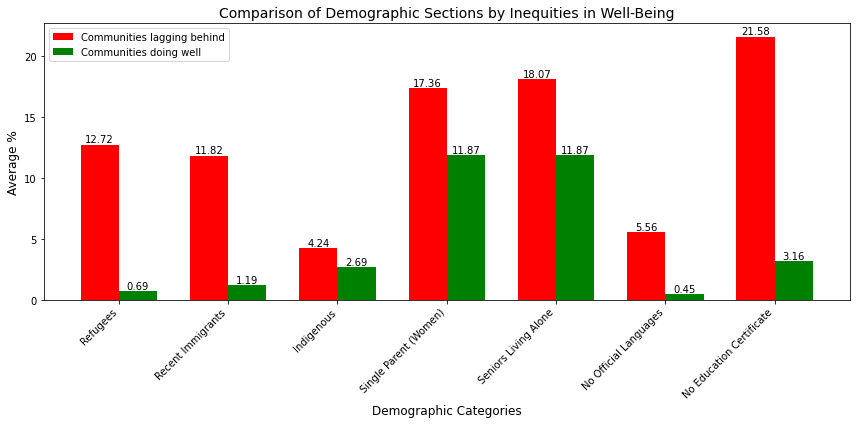

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar chart
categories = [
    "Refugees", "Recent Immigrants", "Indigenous",
     "Single Parent (Women)",
    "Seniors Living Alone", "No Official Languages",
    "No Education Certificate"
]

highest_inequities = [
    12.72, 11.819, 4.235, 17.362, 18.07, 5.556, 21.582
]

least_inequities = [
    0.689, 1.191, 2.694, 11.871, 11.871, 0.447, 3.156
]

# Bar width
bar_width = 0.35
index = np.arange(len(categories))

# Create the plot
plt.figure(figsize=(12, 6))
bars1 = plt.bar(index, highest_inequities, bar_width, label='Communities lagging behind', color='red')
bars2 = plt.bar(index + bar_width, least_inequities, bar_width, label='Communities doing well', color='green')


# Add values on top of the bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
             ha='center', va='bottom', fontsize=10)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
             ha='center', va='bottom', fontsize=10)
    

# Add labels, title, and legend
plt.xlabel('Demographic Categories', fontsize=12)
plt.ylabel('Average %', fontsize=12)
plt.title('Comparison of Demographic Sections by Inequities in Well-Being', fontsize=14)
plt.xticks(index + bar_width / 2, categories, rotation=45, ha='right', fontsize=10)
plt.legend()

# Adjust layout and display the chart
plt.tight_layout()
plt.show()

### (15) 3 communities with highest inequities in the human and social wellbeing domain:

Highly inequitable communities in the human and social wellbeing domain are also the communities that have the highest number of refugees, recent immigrants and indigenous populations

In [71]:
query = """
SELECT communities, human_and_social_wellbeing_domain_score, Quadrant, refugee_perc, recent_immigration_perc, indigenous_perc,
seniors_65_perc, seniors_in_poverty_perc, seniors_living_alone_perc, single_parent_woman_perc, no_official_languages_perc, educ_no_cert_perc
FROM CEI_table

ORDER BY human_and_social_wellbeing_domain_score DESC
LIMIT 10;
"""
result = pd.read_sql_query(query, engine)


print(result)
# Create a new table and store the results
result.to_sql('highest_inequity_in_hs_wellbeing', con=engine, if_exists='replace', index=False)

                                        Communities  \
0                                       FOREST LAWN   
1                                       MARLBOROUGH   
2                                       MARLBOROUGH   
3  ALBERT PARK/RADISSON HEIGHTS, FRANKLIN, MERIDIAN   
4                                       FALCONRIDGE   
5                                 PENBROOKE MEADOWS   
6                                            RUNDLE   
7                                          TARADALE   
8                                10E, MONTEREY PARK   
9                                        MARTINDALE   

   human_and_social_wellbeing_domain_score Quadrant  refugee_perc  \
0                                    50.93       SE         12.12   
1                                    48.64       NE         17.58   
2                                    48.54       NE         17.28   
3                                    48.06       SE         12.26   
4                                    47.92       

10

In [13]:

# Create a base map centered on Calgary
calgary_map = folium.Map(location=[51.0447, -114.0719], zoom_start=11)

# List of communities with coordinates (replace with actual latitude and longitude values)
communities = [
    {"name": "FOREST LAWN", "location": [51.0328, -113.9845], "score": 50.93},
    {"name": "MARLBOROUGH", "location": [51.0658, -113.9785], "score": 48.64},
    {"name": "MARLBOROUGH", "location": [51.0658, -113.9785], "score": 48.54},
    {"name": "ALBERT PARK/RADISSON HEIGHTS", "location": [51.0442, -113.9775], "score": 48.06},
    {"name": "FALCONRIDGE", "location": [51.0955, -113.9385], "score": 47.92},
    {"name": "PENBROOKE MEADOWS", "location": [51.0376, -113.9565], "score": 47.19},
    {"name": "RUNDLE", "location": [51.0664, -113.9385], "score": 46.31},
    {"name": "TARADALE", "location": [51.1275, -113.9155], "score": 45.17},
    {"name": "MONTEREY PARK", "location": [51.0742, -113.9375], "score": 45.09},
    {"name": "MARTINDALE", "location": [51.1305, -113.9305], "score": 44.93},
]

# Add markers for each community
for community in communities:
    folium.Marker(
        location=community["location"],
        popup=f"{community['name']}<br>Human & Social Well-being Score: {community['score']}",
        icon=folium.Icon(color="red" if community["score"] > 50 else "orange")
    ).add_to(calgary_map)

# Save the map as an HTML file
calgary_map.save("calgary_inequities_map.html")

# Display the map
calgary_map

In [72]:
query_new_table = """
SELECT AVG(refugee_perc) as avg_refugee_pct, AVG(recent_immigration_perc) as avg_recent_immi_pct, AVG(indigenous_perc),AVG(seniors_in_poverty_perc),
AVG(single_parent_woman_perc), AVG(seniors_living_alone_perc), AVG(no_official_languages_perc), AVG(educ_no_cert_perc)
FROM highest_inequity_in_hs_wellbeing;
""" 
result_new = pd.read_sql_query(query_new_table, engine)

print(result_new)

   avg_refugee_pct  avg_recent_immi_pct  AVG(indigenous_perc)  \
0            12.72               11.819                 4.235   

   AVG(seniors_in_poverty_perc)  AVG(single_parent_woman_perc)  \
0                         7.693                         17.362   

   AVG(seniors_living_alone_perc)  AVG(no_official_languages_perc)  \
0                           18.07                            5.556   

   AVG(educ_no_cert_perc)  
0                  21.582  


In [63]:
# Create a base map centered on Calgary
calgary_map = folium.Map(location=[51.0447, -114.0719], zoom_start=13)
#calgary_map = folium.Map(location=[51.0447, -114.0719], zoom_start=11, tiles="CartoDB Positron")
#calgary_map = folium.Map(location=[51.0447, -114.0719], zoom_start=11, tiles="Stamen Toner Lite")



# Communities with the highest inequities (replace with actual lat/lon coordinates)
highest_inequities = [
    {"name": "FOREST LAWN", "location": [51.0328, -113.9845], "score": 50.93},
    {"name": "MARLBOROUGH", "location": [51.0658, -113.9785], "score": 48.64},
    {"name": "MARLBOROUGH", "location": [51.0658, -113.9785], "score": 48.54},
    {"name": "ALBERT PARK/RADISSON HEIGHTS", "location": [51.0442, -113.9775], "score": 48.06},
    {"name": "FALCONRIDGE", "location": [51.0955, -113.9385], "score": 47.92},
    {"name": "PENBROOKE MEADOWS", "location": [51.0376, -113.9565], "score": 47.19},
    {"name": "RUNDLE", "location": [51.0664, -113.9385], "score": 46.31},
    {"name": "TARADALE", "location": [51.1275, -113.9155], "score": 45.17},
    {"name": "MONTEREY PARK", "location": [51.0742, -113.9375], "score": 45.09},
    {"name": "MARTINDALE", "location": [51.1305, -113.9305], "score": 44.93},
]

# Communities with the least inequities (replace with actual lat/lon coordinates)
least_inequities = [
    {"name": "CHAPARRAL", "location": [50.8833, -114.0602], "score": 14.04},
    {"name": "FISH CREEK PARK, MCKENZIE LAKE", "location": [50.9231, -113.9878], "score": 14.80},
    {"name": "SUNDANCE", "location": [50.8977, -114.0435], "score": 16.24},
    {"name": "HASKAYNE", "location": [51.1551, -114.2164], "score": 16.42},
    {"name": "ELBOW PARK, UPPER MOUNT ROYAL", "location": [51.0215, -114.0862], "score": 16.88},
    {"name": "DOUGLASDALE/GLEN", "location": [50.9287, -113.9882], "score": 16.94},
    {"name": "LAKE BONAVISTA", "location": [50.9342, -114.0566], "score": 17.09},
    {"name": "BONAVISTA DOWNS, LAKE BONAVISTA", "location": [50.9333, -114.0550], "score": 17.34},
    {"name": "FISH CREEK PARK, PARKLAND", "location": [50.9241, -114.0139], "score": 17.36},
    {"name": "FISH CREEK PARK, SUNDANCE", "location": [50.8977, -114.0435], "score": 17.73},
]

# Add markers for highest inequities
for community in highest_inequities:
    folium.Marker(
        location=community["location"],
        popup=f"{community['name']}<br>Score: {community['score']}",
        icon=folium.Icon(color="red")
    ).add_to(calgary_map)

# Add markers for least inequities
for community in least_inequities:
    folium.Marker(
        location=community["location"],
        popup=f"{community['name']}<br>Score: {community['score']}",
        icon=folium.Icon(color="green")
    ).add_to(calgary_map)

# Save and display the map
calgary_map.save("calgary_inequities_combined_map.html")
calgary_map

In [13]:
import folium
import geopandas as gpd

# Load Calgary's GeoJSON file
# Replace 'calgary_communities.geojson' with the path to your GeoJSON file
geojson_file = 'https://basemaps.arcgis.com/arcgis/rest/services/World_Basemap_v2/VectorTileServer'

# Load your data (e.g., communities with tree canopy percentages)
# Replace 'data.csv' with your CSV or database containing the metric for each community
data = {
    'GLENMORE PARK, OAKRIDGE': 37.59,
    'EVERGREEN, FISH CREEK PARK': 36.54,
    'MEDICINE HILL': 35.53,
    'UPPER MOUNT ROYAL': 32.13,
    # Add more communities and their corresponding values...
}

# Create a base map
calgary_map = folium.Map(location=[51.0447, -114.0719], zoom_start=11, tiles="CartoDB Positron")

# Add a Choropleth layer
folium.Choropleth(
    geo_data=geojson_file,
    data=data,
    columns=['Community', 'Value'],  # Adjust keys based on your dataset
    key_on='feature.properties.name',  # Match this to the 'name' property in the GeoJSON file
    fill_color='YlGn',  # Yellow-Green gradient for coloring
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Tree Canopy Percentage (%)'  # Adjust based on the metric you're plotting
).add_to(calgary_map)

# Save and display the map
calgary_map.save("calgary_choropleth_map.html")
calgary_map

AttributeError: 'NoneType' object has no attribute 'get'